In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #서브 패키지 pyplot 사용
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
else:
    print('Unknown system...  sorry~~~')

In [4]:
import seaborn as sns #seaborn 패키지 임포트

In [5]:
data=pd.read_csv('cluster_0s.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시군구          30 non-null     object 
 1   SIG_CD       30 non-null     int64  
 2   SIG_KOR_NM   30 non-null     object 
 3   인구수          30 non-null     float64
 4   사망률          30 non-null     float64
 5   고령화비율        30 non-null     float64
 6   전체 가구수       30 non-null     int64  
 7   산림면적(ha)     30 non-null     int64  
 8   고용률          30 non-null     float64
 9   경제활동인구       30 non-null     float64
 10  유소년비율        30 non-null     float64
 11  조출생률         30 non-null     float64
 12  1인 가구비율      30 non-null     float64
 13  터널수          30 non-null     int64  
 14  만명당 매장 수     30 non-null     float64
 15  만명 당 의료기관 수  30 non-null     float64
 16  만명당 3차병원수    30 non-null     float64
 17  만명당 2차병원 수   30 non-null     float64
 18  만명당 1차병원 수   30 non-null     float64
 19  만명당 요양병원 수

In [6]:
pj_data = data.drop(['SIG_CD','SIG_KOR_NM','시도','인구수','사망률','고령화비율','전체 가구수','산림면적(ha)','고용률','경제활동인구','3차산업비율','총가구수','cluster'], axis=1)
pj_data.set_index('시군구', inplace=True)
pj_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 강원도 삼척시 to 충청북도 옥천군
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   유소년비율        30 non-null     float64
 1   조출생률         30 non-null     float64
 2   1인 가구비율      30 non-null     float64
 3   터널수          30 non-null     int64  
 4   만명당 매장 수     30 non-null     float64
 5   만명 당 의료기관 수  30 non-null     float64
 6   만명당 3차병원수    30 non-null     float64
 7   만명당 2차병원 수   30 non-null     float64
 8   만명당 1차병원 수   30 non-null     float64
 9   만명당 요양병원 수   30 non-null     float64
 10  만먕당 한의원 수    30 non-null     float64
 11  1차산업비율       30 non-null     float64
 12  2차산업비율       30 non-null     float64
 13  ktx거리        30 non-null     float64
 14  빈집비율         30 non-null     float64
 15  산지면적/도시면적    30 non-null     float64
 16  재정자립도        30 non-null     float64
 17  연평균인구증감률     30 non-null     float64
dtypes: float64(17), int64(1)
memory usage: 4.5+ K

In [7]:
#X=pj_data
#from sklearn import preprocessing
#X=preprocessing.StandardScaler().fit(X).transform(X)

In [8]:
kmeans=KMeans(n_clusters=3, init='k-means++', random_state=10)
kmeans.fit(pj_data)

KMeans(n_clusters=3, random_state=10)

In [9]:
kmeans.labels_

array([0, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 0, 2, 2, 0, 1], dtype=int32)

In [10]:
cluster = kmeans.predict(pj_data)
cluster

array([0, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 0, 2, 2, 0, 1], dtype=int32)

In [11]:
pj_data['cluster']=kmeans.labels_

In [12]:
pj_data.head(3)

,유소년비율,조출생률,1인 가구비율,터널수,만명당 매장 수,만명 당 의료기관 수,만명당 3차병원수,만명당 2차병원 수,만명당 1차병원 수,만명당 요양병원 수,만먕당 한의원 수,1차산업비율,2차산업비율,ktx거리,빈집비율,산지면적/도시면적,재정자립도,연평균인구증감률,cluster
시군구,,,,,,,,,,,,,,,,,,,
강원도 삼척시,9.679533,5.455404,0.403534,20,0.609542,8.381208,0.0,0.152386,0.152386,0.152386,1.523856,9.12,16.64,6.5740,17.2,13.059622,13.5,-1.6028,0
강원도 영월군,7.560308,3.207719,0.378748,11,1.043161,8.345286,0.0,0.260790,0.260790,0.260790,1.564741,25.87,12.82,23.6510,11.3,36.154246,15.2,-0.8921,2
강원도 정선군,8.385427,3.662600,0.377771,1,0.826150,9.087655,0.0,0.000000,0.550767,0.000000,1.376917,16.63,13.35,28.7242,14.3,24.497452,21.5,-1.2152,2


In [13]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

In [14]:
pca_transformed=pca.fit_transform(pj_data)

In [15]:
pca_transformed

array([[  6.28467037, -12.26246129],
       [  3.39524383,  16.67756623],
       [-12.8751884 ,  11.64078383],
       [-28.09399359,   2.09270749],
       [ 61.41598502,  23.51450962],
       [ 39.35673046,  34.21671796],
       [ -9.79045551,   3.13269937],
       [-31.1951602 ,  18.66733181],
       [-21.94100666,  20.51067522],
       [ 25.85780062, -20.20466215],
       [ -4.26670636, -13.7697666 ],
       [  0.35088732,  -4.18461558],
       [ -7.23949631,  13.85568244],
       [ 24.74480609, -14.81803989],
       [  1.79162747, -19.90870051],
       [ -6.19926326,  -3.08805589],
       [-33.60468701,  25.62878974],
       [-21.56682721,   2.62002624],
       [-14.79209295,  -5.56110353],
       [ -8.57773092, -12.07229953],
       [  1.11359915, -14.76744542],
       [ 25.39692914, -15.04644011],
       [  1.37611064, -21.33175798],
       [ 10.06528049, -12.59001505],
       [ -9.27079944,  -1.24314032],
       [ -4.98546028, -21.66518552],
       [-23.92379839,   8.70804398],
 

In [16]:
pj_data['pca_x']=pca_transformed[:,0]
pj_data['pca_y']=pca_transformed[:,1]
pj_data.head()

,유소년비율,조출생률,1인 가구비율,터널수,만명당 매장 수,만명 당 의료기관 수,만명당 3차병원수,만명당 2차병원 수,만명당 1차병원 수,만명당 요양병원 수,...,1차산업비율,2차산업비율,ktx거리,빈집비율,산지면적/도시면적,재정자립도,연평균인구증감률,cluster,pca_x,pca_y
시군구,,,,,,,,,,,,,,,,,,,,,
강원도 삼척시,9.679533,5.455404,0.403534,20,0.609542,8.381208,0.0,0.152386,0.152386,0.152386,...,9.12,16.64,6.5740,17.2,13.059622,13.5,-1.6028,0,6.284670,-12.262461
강원도 영월군,7.560308,3.207719,0.378748,11,1.043161,8.345286,0.0,0.260790,0.260790,0.260790,...,25.87,12.82,23.6510,11.3,36.154246,15.2,-0.8921,2,3.395244,16.677566
강원도 정선군,8.385427,3.662600,0.377771,1,0.826150,9.087655,0.0,0.000000,0.550767,0.000000,...,16.63,13.35,28.7242,14.3,24.497452,21.5,-1.2152,2,-12.875188,11.640784
강원도 태백시,10.754824,3.807227,0.343536,3,0.945895,8.276580,0.0,0.236474,0.236474,0.000000,...,2.48,16.93,39.1708,15.2,4.035657,18.5,-2.3956,2,-28.093994,2.092707
강원도 홍천군,9.220416,4.297034,0.334372,88,0.873973,10.779001,0.0,0.145662,0.291324,0.436987,...,28.52,13.70,26.1157,13.1,49.400297,12.1,-0.2989,1,61.415985,23.514510


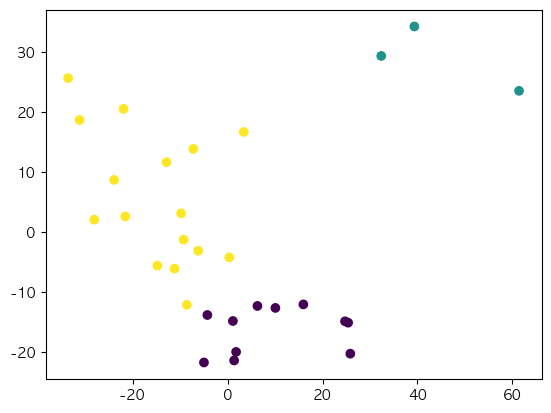

In [17]:
plt.scatter(x=pj_data.loc[:,'pca_x'],y=pj_data.loc[:,'pca_y'],
           c=pj_data['cluster'])

pj_data.reset_index(inplace=True)

for i in range(len(pj_data)):
    row=pj_data.iloc[i]
    name=row['시군구']
    x = row['pca_x']
    y = row['pca_y']
    if name in ['경상북도 울릉군']:
        plt.text(x-0.5, y-0.5, name, fontsize=8)

pj_data.set_index('시군구', inplace=True)

In [18]:
pj_data.reset_index(inplace=True)
clusterDF = pd.DataFrame(data=pca_transformed, columns=['ftr1','ftr2'])
clusterDF['cluster'] = pj_data['cluster']
clusterDF

,ftr1,ftr2,cluster
0,6.284670,-12.262461,0
1,3.395244,16.677566,2
2,-12.875188,11.640784,2
3,-28.093994,2.092707,2
4,61.415985,23.514510,1
5,39.356730,34.216718,1
6,-9.790456,3.132699,2
7,-31.195160,18.667332,2
8,-21.941007,20.510675,2
9,25.857801,-20.204662,0


In [19]:
centers=kmeans.cluster_centers_
centers

array([[ 9.96298821,  4.11894353,  0.34759208, 24.45454545,  0.79107169,
        12.03364474,  0.        ,  0.075965  ,  0.2795567 ,  0.4725384 ,
         2.359386  , 27.55636364, 18.21545455,  6.525     , 13.90909091,
         9.66013992, 12.        , -1.29978182],
       [ 8.76840789,  3.75185021,  0.31683642, 43.33333333,  0.84488736,
        11.74536265,  0.        ,  0.11471657,  0.16933636,  0.41637795,
         2.58628172, 30.89333333, 16.49666667, 13.7538    , 12.66666667,
        63.20023423, 11.63333333, -0.2938    ],
       [ 9.35527223,  4.58389051,  0.34627702, 10.625     ,  0.79821105,
        11.31244387,  0.        ,  0.0929717 ,  0.24564234,  0.27425844,
         2.39351416, 27.214375  , 17.14125   , 36.3965    , 14.2875    ,
        13.01210828, 14.15      , -1.03928125]])

In [20]:
unique_labels=np.unique(cluster)
unique_labels

array([0, 1, 2], dtype=int32)

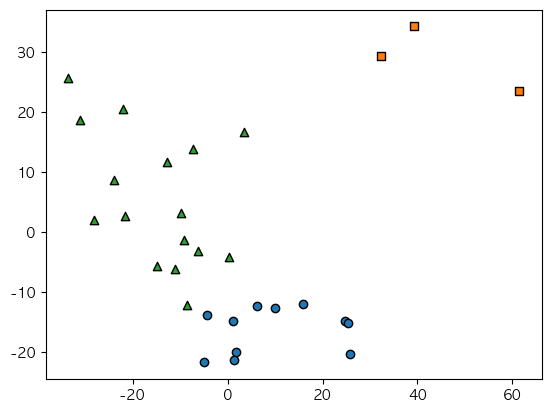

In [21]:
markers=['o','s','^','P','D','H','x']

for target in unique_labels :
    target_cluster = clusterDF[clusterDF['cluster']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'],
               edgecolor='k', marker=markers[target])
plt.show()

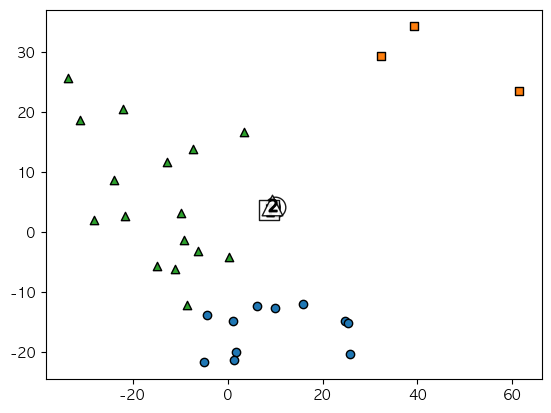

In [22]:
for label in unique_labels:
    
    label_cluster=clusterDF[clusterDF['cluster']==label]
    center_x_y=centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'],
                edgecolor='k', marker=markers[label])
    
    center_x_y=centers[label]
    
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=220, color='white',
               alpha=0.9, edgecolor='k',  marker=markers[label])
    
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=80, color='k',
                edgecolor='k', marker='$%d$' % label)
    
    
plt.show()

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

In [24]:
pj_data.set_index('시군구',inplace=True)
pj_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 강원도 삼척시 to 충청북도 옥천군
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   유소년비율        30 non-null     float64
 1   조출생률         30 non-null     float64
 2   1인 가구비율      30 non-null     float64
 3   터널수          30 non-null     int64  
 4   만명당 매장 수     30 non-null     float64
 5   만명 당 의료기관 수  30 non-null     float64
 6   만명당 3차병원수    30 non-null     float64
 7   만명당 2차병원 수   30 non-null     float64
 8   만명당 1차병원 수   30 non-null     float64
 9   만명당 요양병원 수   30 non-null     float64
 10  만먕당 한의원 수    30 non-null     float64
 11  1차산업비율       30 non-null     float64
 12  2차산업비율       30 non-null     float64
 13  ktx거리        30 non-null     float64
 14  빈집비율         30 non-null     float64
 15  산지면적/도시면적    30 non-null     float64
 16  재정자립도        30 non-null     float64
 17  연평균인구증감률     30 non-null     float64
 18  cluster      30 non-null     int32  
 19  pca

In [33]:
pj_data.to_csv('project_result_0.csv')

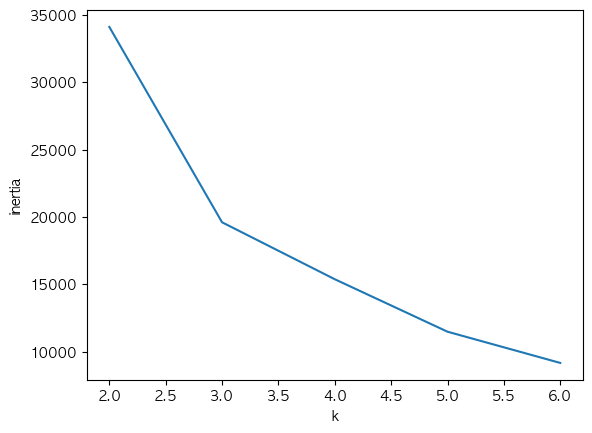

In [26]:
inertia=[]
for k in range(2,7):
    km=KMeans(n_clusters=k)
    km.fit(pj_data)
    inertia.append(km.inertia_)
plt.plot(range(2,7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.savefig('approprate_k.png')
plt.show()

In [27]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

Automatically created module for IPython interactive environment


In [28]:
X= pca_transformed

In [29]:
y= kmeans.labels_

In [30]:
data.columns

Index(['시군구', 'SIG_CD', 'SIG_KOR_NM', '인구수', '사망률', '고령화비율', '전체 가구수',
       '산림면적(ha)', '고용률', '경제활동인구', '유소년비율', '조출생률', '1인 가구비율', '터널수',
       '만명당 매장 수', '만명 당 의료기관 수', '만명당 3차병원수', '만명당 2차병원 수', '만명당 1차병원 수',
       '만명당 요양병원 수', '만먕당 한의원 수', '1차산업비율', '2차산업비율', '3차산업비율', 'ktx거리',
       '빈집비율', '산지면적/도시면적', '재정자립도', '연평균인구증감률', '시도', '총가구수', 'cluster'],
      dtype='object')

In [31]:
df=data.drop(['시도','SIG_CD','SIG_KOR_NM'], axis=1)
df

,시군구,인구수,사망률,고령화비율,전체 가구수,산림면적(ha),고용률,경제활동인구,유소년비율,조출생률,...,1차산업비율,2차산업비율,3차산업비율,ktx거리,빈집비율,산지면적/도시면적,재정자립도,연평균인구증감률,총가구수,cluster
0,강원도 삼척시,65623.0,964.6,24.495985,31016,104323,61.0,70.0,9.679533,5.455404,...,9.12,16.64,74.38,6.5740,17.2,13.059622,13.5,-1.6028,31016,0
1,강원도 영월군,38345.0,1053.6,28.819924,17175,95389,65.8,43.4,7.560308,3.207719,...,25.87,12.82,61.07,23.6510,11.3,36.154246,15.2,-0.8921,17175,0
2,강원도 정선군,36313.0,1027.2,26.847135,16375,104220,70.0,43.1,8.385427,3.662600,...,16.63,13.35,70.02,28.7242,14.3,24.497452,21.5,-1.2152,16375,0
3,강원도 태백시,42288.0,848.9,23.725407,18688,26855,61.6,45.0,10.754824,3.807227,...,2.48,16.93,80.14,39.1708,15.2,4.035657,18.5,-2.3956,18688,0
4,강원도 홍천군,68652.0,1091.0,25.489425,29533,151734,71.1,81.7,9.220416,4.297034,...,28.52,13.70,57.66,26.1157,13.1,49.400297,12.1,-0.2989,29533,0
5,강원도 횡성군,46150.0,1118.1,28.667389,19775,76193,66.2,52.9,8.047671,3.445287,...,34.74,15.93,49.52,2.4118,13.2,76.815978,11.4,0.2604,19775,0
6,경기도 가평군,61675.0,1060.4,25.363600,26056,69030,61.0,64.9,9.139846,4.296717,...,13.10,13.42,73.48,37.6521,15.6,8.429662,18.0,-0.0284,26056,0
7,경기도 연천군,43104.5,1090.4,25.628415,18368,41162,62.0,45.2,9.985036,5.637462,...,25.00,18.92,55.86,55.5834,6.9,13.520074,18.3,-1.3283,18368,0
8,경상남도 거창군,61478.0,1159.8,27.196721,26054,60250,67.9,71.7,10.520837,3.871304,...,35.69,13.88,50.42,53.3994,14.8,18.883300,8.9,-0.7209,26054,0
9,경상남도 밀양시,104300.5,1131.3,27.733328,46860,51798,61.2,113.1,9.109256,3.576205,...,30.88,18.07,50.95,3.8183,15.0,8.430431,13.7,-0.8229,46860,0


For n_clusters = 2 The average silhouette_score is : 0.5175574781670107
For n_clusters = 3 The average silhouette_score is : 0.3578559012446452
For n_clusters = 4 The average silhouette_score is : 0.3077430676156094
For n_clusters = 5 The average silhouette_score is : 0.2511131810950398
For n_clusters = 6 The average silhouette_score is : 0.26087244621396427


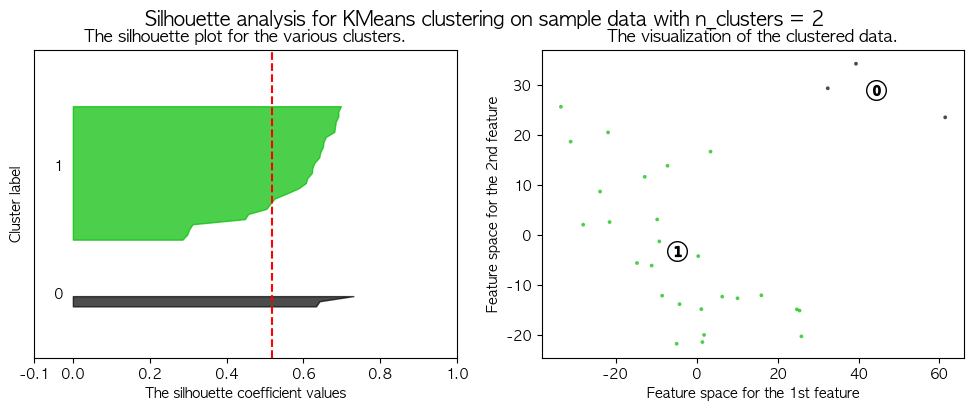

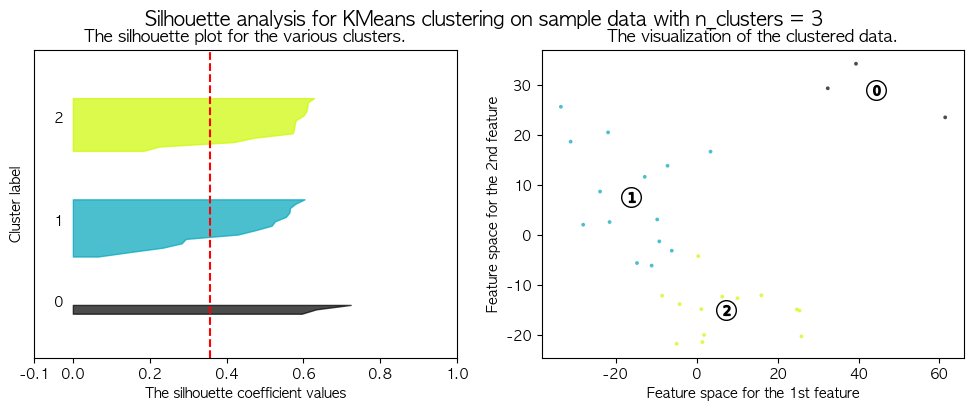

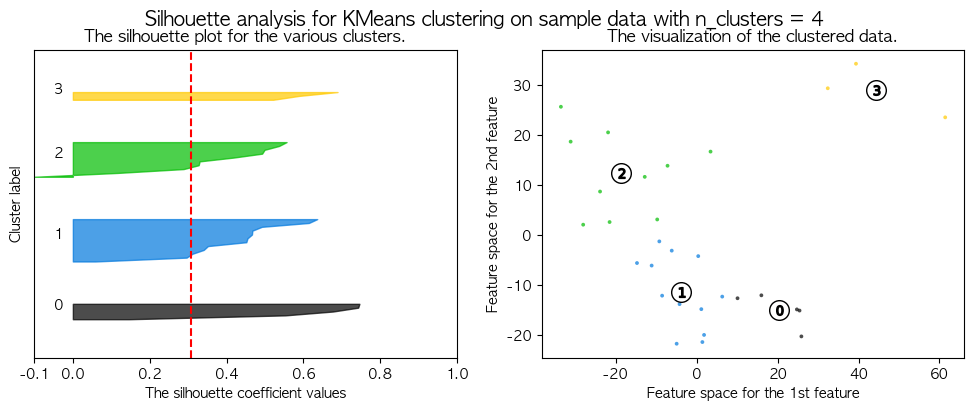

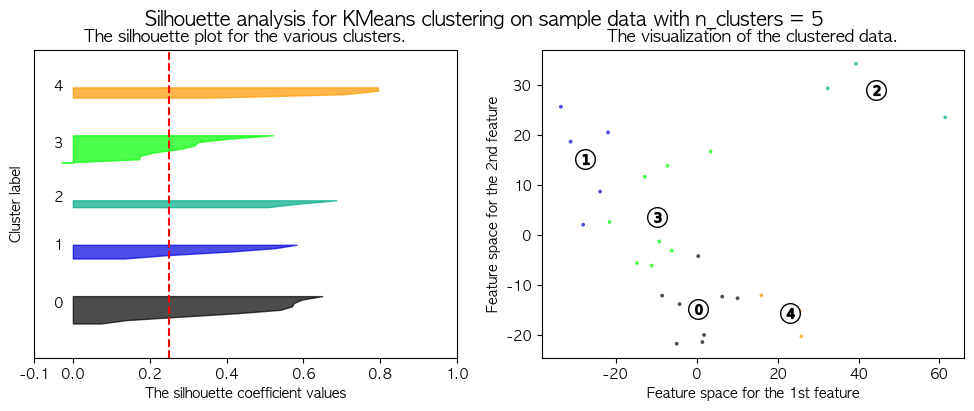

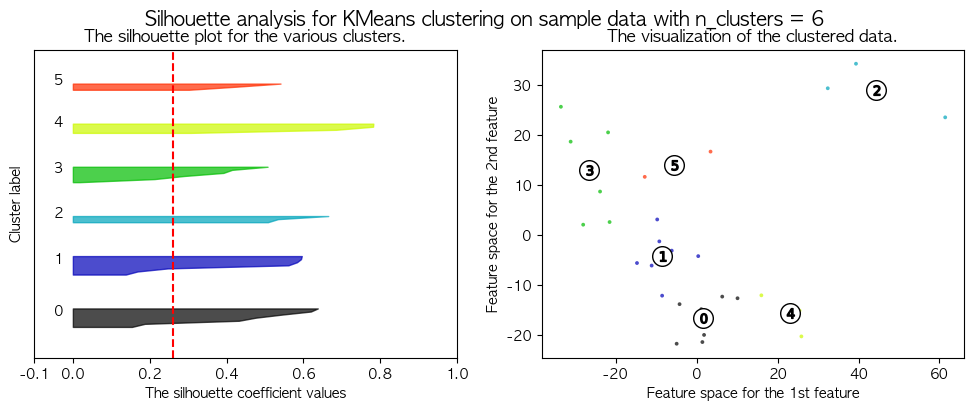

In [32]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
#     fig.set_size_inches(18, 7)
    fig.set_size_inches(12, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pj_data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#### 